In [1]:
import tensorflow
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#File path
file_path = 'Recursos/Lottery_Pick_10_Winning_Numbers__Beginning_1987.csv'

# Read the CSV file into a DataFrame
Lottery_df = pd.read_csv(file_path)

# Display the DataFrame
print(Lottery_df.head())


    Draw Date                                    Winning Numbers
0  09/24/2020  06 15 17 20 22 23 27 31 32 40 43 48 49 53 55 6...
1  09/25/2020  03 05 06 07 08 19 20 21 22 24 25 33 41 48 50 5...
2  09/26/2020  04 06 12 14 20 21 22 28 32 33 34 37 40 41 43 4...
3  09/27/2020  03 10 15 21 26 30 32 37 45 47 51 52 55 57 62 6...
4  09/28/2020  02 11 16 18 22 23 39 41 57 58 59 60 63 67 69 7...


In [3]:
Lottery_df.shape

(13609, 2)

In [4]:
# Ensure the 'Draw Date' column is in datetime format
Lottery_df['Draw Date'] = pd.to_datetime(Lottery_df['Draw Date'])

# Extract month from `Draw Date`
Lottery_df['Month'] = Lottery_df['Draw Date'].dt.month_name()

# Display the DataFrame to check the new 'Month' column
Lottery_df.head()


,Draw Date,Winning Numbers,Month
0,2020-09-24,06 15 17 20 22 23 27 31 32 40 43 48 49 53 55 6...,September
1,2020-09-25,03 05 06 07 08 19 20 21 22 24 25 33 41 48 50 5...,September
2,2020-09-26,04 06 12 14 20 21 22 28 32 33 34 37 40 41 43 4...,September
3,2020-09-27,03 10 15 21 26 30 32 37 45 47 51 52 55 57 62 6...,September
4,2020-09-28,02 11 16 18 22 23 39 41 57 58 59 60 63 67 69 7...,September


In [5]:
# Create an empty DataFrame to store the counts for all months
all_months_df = pd.DataFrame(0, index=Lottery_df['Month'].unique(), columns=range(1, 81))

# Iterate through each row of the DataFrame
for index, row in Lottery_df.iterrows():
    # Split the 'Winning Numbers' into a list of integers
    winning_numbers = list(map(int, row['Winning Numbers'].split()))

    # Count the occurrences of each number in the Winning Numbers for the current month
    for number in winning_numbers:
        all_months_df.loc[row['Month'], number] += 1

# Display the all_months_df to check the counts
all_months_df.head()


,1,2,3,4,5,6,7,8,9,10,...,71,72,73,74,75,76,77,78,79,80
September,260,256,267,283,283,284,268,282,270,282,...,246,278,284,304,250,282,280,286,275,290
October,305,286,312,297,295,271,264,284,295,263,...,258,289,282,277,277,301,300,307,290,307
November,283,257,243,291,288,310,269,282,291,262,...,307,270,288,296,246,270,273,257,284,282
March,266,290,312,322,280,295,329,277,314,287,...,292,307,293,294,290,301,263,287,304,287
April,290,297,298,278,282,291,263,314,302,287,...,271,278,267,268,268,294,249,313,294,264


C:\Users\joesa\anaconda3\envs\Env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joesa\anaconda3\envs\Env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joesa\anaconda3\envs\Env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joesa\anaconda3\envs\Env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

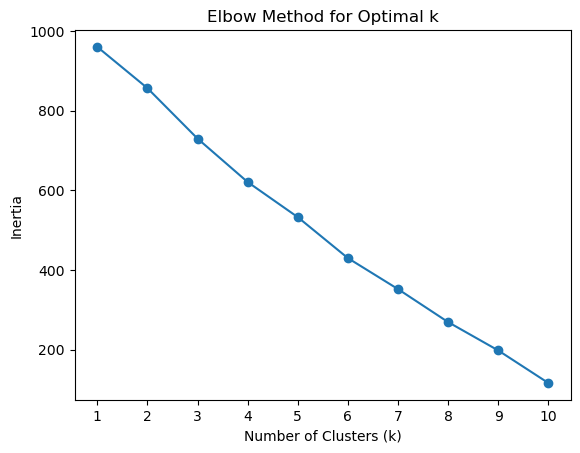

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_months_df)

# Calculate inertia for different cluster numbers
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Create a DataFrame for the elbow data
elbow_data = pd.DataFrame({'k': range(1, 11), 'inertia': inertia})

# Create the line plot
plt.plot(elbow_data['k'], elbow_data['inertia'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_data['k'])
plt.show()


In [7]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_months_df)

# Display the scaled data
pd.DataFrame(scaled_data, index=all_months_df.index, columns=all_months_df.columns)


,1,2,3,4,5,6,7,8,9,10,...,71,72,73,74,75,76,77,78,79,80
September,-1.255947,-1.668384,-1.132432,-0.273892,0.203616,-0.172385,-0.344945,-0.238342,-1.171278,-0.297906,...,-1.672835,-0.579326,0.518265,1.651009,-1.399649,-0.093674,0.067342,-0.225262,-0.588560,0.193407
October,1.313036,0.000000,1.333347,0.506003,1.180971,-1.039868,-0.554532,-0.128338,0.169880,-1.510809,...,-1.070614,0.047486,0.264421,-0.791580,0.101961,1.092861,1.221775,0.866394,0.309243,1.466146
November,0.057089,-1.612771,-2.447514,0.171763,0.610847,1.562583,-0.292549,-0.238342,-0.044705,-1.574646,...,1.388453,-1.035189,1.025953,0.927279,-1.622110,-0.843064,-0.336710,-1.732787,-0.049878,-0.405530
March,-0.913416,0.222451,1.333347,1.898673,-0.040723,0.561640,2.851257,-0.513351,1.189160,0.021279,...,0.635677,1.073177,1.660562,0.746347,0.824959,1.092861,-0.913926,-0.173279,1.147193,-0.031195
April,0.456708,0.611741,0.566216,-0.552426,0.122169,0.294722,-0.606929,1.521720,0.545404,0.021279,...,-0.418209,-0.579326,-1.639409,-1.605776,-0.398576,0.655717,-1.722030,1.178295,0.548657,-1.753137
December,-0.399620,-0.778579,-0.036530,-0.218185,-2.484112,1.228935,-0.397342,-0.623355,-0.527522,-1.638483,...,-0.167284,0.617314,-0.243267,-0.248782,0.991804,-1.342658,0.644559,-0.329230,-1.246949,1.690748
January,-1.084682,1.112256,0.566216,1.564433,-0.366508,-1.440245,0.283816,0.421681,0.062587,0.595812,...,0.485122,1.415074,-0.877877,0.746347,0.157576,1.155310,0.529115,1.646148,-0.229439,0.193407
February,0.114177,0.278064,-0.584481,-0.998080,-1.018079,-0.439303,-1.130897,-0.678357,-2.405143,1.042671,...,-1.622650,-2.402777,-1.639409,-1.243911,-0.787882,-1.842251,0.702280,-1.472869,-0.349146,-1.678270
August,0.513797,-0.945418,0.073060,0.338883,0.692294,-0.239114,-0.502136,1.466718,1.028221,0.787323,...,0.284382,0.275417,0.010577,-0.972512,0.046346,-0.718166,-1.548865,-0.537164,-0.109731,0.343141
July,2.169363,1.445933,0.292240,0.338883,-0.203616,0.094533,0.598196,0.146672,1.028221,1.234182,...,0.234197,0.845246,0.264421,-0.520181,-0.398576,-0.281021,0.933167,1.074328,0.009976,-0.704998


In [8]:
# Perform KMeans clustering with the chosen number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
all_months_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Display the DataFrame with cluster assignments
all_months_df.head()


C:\Users\joesa\anaconda3\envs\Env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,1,2,3,4,5,6,7,8,9,10,...,72,73,74,75,76,77,78,79,80,Cluster
September,260,256,267,283,283,284,268,282,270,282,...,278,284,304,250,282,280,286,275,290,1
October,305,286,312,297,295,271,264,284,295,263,...,289,282,277,277,301,300,307,290,307,0
November,283,257,243,291,288,310,269,282,291,262,...,270,288,296,246,270,273,257,284,282,1
March,266,290,312,322,280,295,329,277,314,287,...,307,293,294,290,301,263,287,304,287,0
April,290,297,298,278,282,291,263,314,302,287,...,278,267,268,268,294,249,313,294,264,0


In [9]:
# Perform KMeans clustering with the chosen number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
all_months_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Display the DataFrame with cluster assignments
all_months_df.head()



C:\Users\joesa\anaconda3\envs\Env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,1,2,3,4,5,6,7,8,9,10,...,72,73,74,75,76,77,78,79,80,Cluster
September,260,256,267,283,283,284,268,282,270,282,...,278,284,304,250,282,280,286,275,290,1
October,305,286,312,297,295,271,264,284,295,263,...,289,282,277,277,301,300,307,290,307,0
November,283,257,243,291,288,310,269,282,291,262,...,270,288,296,246,270,273,257,284,282,1
March,266,290,312,322,280,295,329,277,314,287,...,307,293,294,290,301,263,287,304,287,0
April,290,297,298,278,282,291,263,314,302,287,...,278,267,268,268,294,249,313,294,264,0


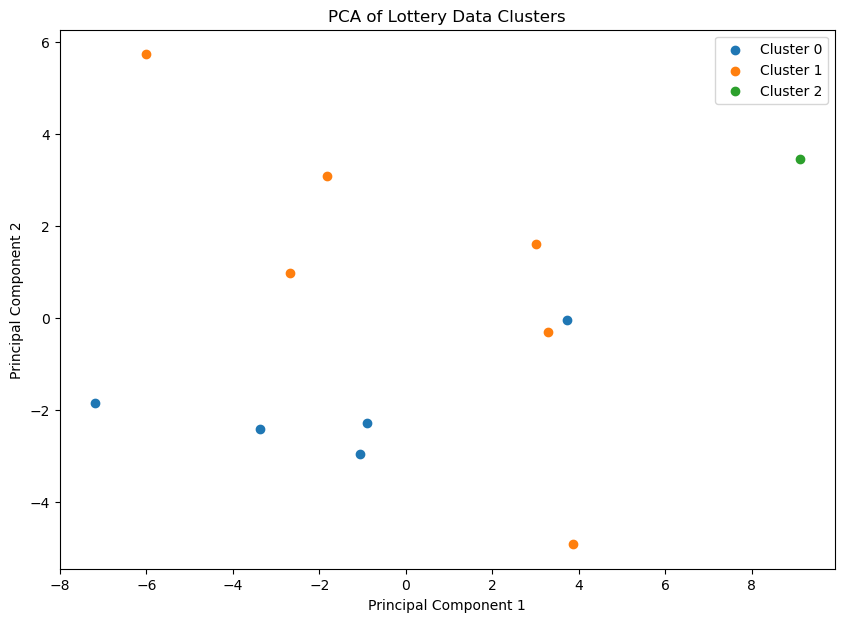

In [10]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = all_months_df['Cluster'].values

# Plot the PCA result
plt.figure(figsize=(10, 7))
for cluster in range(optimal_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('PCA of Lottery Data Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [11]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# One-hot encode the months as the target variable
y = pd.get_dummies(all_months_df.index)  

# Drop the `Cluster` column and use the rest as features
X = all_months_df.drop(columns=['Cluster'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')  
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


C:\Users\joesa\anaconda3\envs\Env\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [19]:
# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)


Epoch 1/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 1.0000 - loss: 0.0436 - val_accuracy: 0.0000e+00 - val_loss: 128.1252
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 1.0000 - loss: 0.0429 - val_accuracy: 0.0000e+00 - val_loss: 128.0959
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 1.0000 - loss: 0.0423 - val_accuracy: 0.0000e+00 - val_loss: 128.0716
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 1.0000 - loss: 0.0417 - val_accuracy: 0.0000e+00 - val_loss: 128.0627
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 1.0000 - loss: 0.0412 - val_accuracy: 0.0000e+00 - val_loss: 128.0786
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 1.0000 - loss: 0.0406 - val_accuracy: 0.0000e+00 - val_loss: 128.1009
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 1.0000 - loss: 0.0401 - val_accuracy: 0.0000e+00 - val_loss: 128.1185
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 1.0000

In [14]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.0000e+00 - loss: 75.4570
Test Loss: 75.4570, Test Accuracy: 0.0000


In [15]:
def predict_best_month(number, model):
    input_vector = [0] * 80
    input_vector[number-1] = 1
    probabilities = model.predict([input_vector])[0]
    best_month_index = probabilities.argmax()
    best_month = y.columns[best_month_index]  
    return best_month

# Example usage
predicted_month = predict_best_month(42, model) 
print(f'Predicted best month for number 42: {predicted_month}')


ValueError: Unrecognized data type: x=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]] (of type <class 'list'>)

In [ ]:
import numpy as np

def predict_best_month(number, model):
    input_vector = np.zeros(80)
    input_vector[number-1] = 1
    probabilities = model.predict(np.array([input_vector]))[0]
    best_month_index = probabilities.argmax()
    best_month = y.columns[best_month_index]  
    return best_month


In [16]:
import numpy as np

def predict_best_month(number, model):
    input_vector = np.zeros(80)
    input_vector[number-1] = 1
    probabilities = model.predict(np.array([input_vector]))[0]
    best_month_index = probabilities.argmax()
    best_month = y.columns[best_month_index]  
    return best_month

# Assuming you have a pre-trained model stored in the variable 'model'

# Prompt user for input
number = int(input("Enter a number between 1 and 80: "))

# Call the function
predicted_month = predict_best_month(number, model) 

# Output the result
print(f'Predicted best month for number {number}: {predicted_month}')


Enter a number between 1 and 80:  12


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Predicted best month for number 12: November


In [17]:
import numpy as np

def predict_best_month(numbers, model):
    input_vector = np.zeros(80)
    for number in numbers:
        input_vector[number-1] = 1
    probabilities = model.predict(np.array([input_vector]))[0]
    best_month_index = probabilities.argmax()
    best_month = y.columns[best_month_index]  
    return best_month

# Assuming you have a pre-trained model stored in the variable 'model'
# Assuming 'y' is a DataFrame containing the month labels (columns)

# Prompt user for input
lottery_numbers = input("Enter the lottery numbers (separated by commas): ")
lottery_numbers = [int(num.strip()) for num in lottery_numbers.split(',')]

# Call the function
predicted_month = predict_best_month(lottery_numbers, model) 


# Output the result
print(f'Predicted best month for the lottery numbers {lottery_numbers}: {predicted_month}')


Enter the lottery numbers (separated by commas):  12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted best month for the lottery numbers [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]: November


In [23]:
import numpy as np

def predict_best_month(numbers, model):
    input_vector = np.zeros(80)
    for number in numbers:
        if 1 <= number <= 80:
            input_vector[number-1] = 1
    probabilities = model.predict(np.array([input_vector]))[0]
    best_month_index = probabilities.argmax()
    best_month = y.columns[best_month_index]  
    return best_month

# Assuming you have a pre-trained model stored in the variable 'model'
# Assuming 'y' is a DataFrame containing the month labels (columns)

# Prompt user for input
lottery_numbers_input = input("Enter the lottery numbers (separated by commas or spaces): ")

# Handle both comma and space-separated inputs
lottery_numbers = lottery_numbers_input.replace(',', ' ').split()
lottery_numbers = [int(num.strip()) for num in lottery_numbers]

# Call the function
predicted_month = predict_best_month(lottery_numbers, model) 

# Output the result
print(f'Predicted best month for the lottery numbers {lottery_numbers}: {predicted_month}')


Enter the lottery numbers (separated by commas or spaces):  06 15 17 20 22 23 27 31 32 40 43 48 49 53 55 60 62 73 74 76


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted best month for the lottery numbers [6, 15, 17, 20, 22, 23, 27, 31, 32, 40, 43, 48, 49, 53, 55, 60, 62, 73, 74, 76]: February


In [ ]:
model.save('saved_model.h5')
